# The Oscars

Last summer, I worked through the University of Rhode Island and collected data for a local oyster farm using different instruments like tilt current meters and a water level logger. The tilt current meter was used to measure the current's speed and direction and water temperature. The water level logger was used to measure the water depth and temperature. The pond, Potter Pond, that houses the oyster farm, Matunuck Oyster Farm, has very high spatial variablility. This makes it very to difficult to find patterns within different phsycial conditions like temperature, current speed, and current direction. It was my job to vizualize this data and attempt to uncover these patterns using MATLAB. I understand that this is not data used in a previous project. However, I wanted to see if I could manipulate this data with Python/ Pandas and use the knowlege from this class to get better vizualizations.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import time
import numpy as np
from scipy.signal import medfilt
import matplotlib.dates as mdates

In [2]:
#adds datetime to data
def addTime(fname):
    df=pd.read_csv(fname, skiprows=[0])
    timeList=df['time'].tolist()
    dateList=[datetime.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%f') for x in timeList]
    utime=[time.mktime(y.timetuple()) for y in dateList]
    df.insert(1,'datetime',dateList,True)
    df.insert(2,'unixtime',utime,True)
    return(df)


In [3]:
#adds datetime to water level logger data
def addDepthTime(pname):
    df=pd.read_csv(pname, skiprows=[0])
    timeList = df['time'].tolist()
    dateList=[datetime.datetime.strptime(x, '%m-%d-%YT%H:%M:%S') for x in timeList]
    utime=[time.mktime(y.timetuple()) for y in dateList]
    df.insert(1,'datetime',dateList,True)
    df.insert(2,'unixtime',utime,True)
    return(df)

# Dataframes

In [4]:
apriltemp_df=addTime('../data/1806202_logger_04172019-06042019_T.txt')
aprilcurrent_df=addTime('../data/1806202_logger_04172019-06042019_CR.txt')

julytemp_df=addTime('../data/1806202_logger_07102019-07172019_T.txt')
julycurrent_df=addTime('../data/1806202_logger_07102019-07172019_CR.txt')
julydepth_df=addDepthTime('../data/190710-190717_depth_SN416.txt')

junetemp_df=addTime('../data/1806202_logger_06042019-07022019_T.txt')
junecurrent_df=addTime('../data/1806202_logger_06042019-07022019_CR.txt')
junedepth_df=addDepthTime('../data/190604-190702_depth_SN416.txt')

juneLongtemp_df=addTime('../data/1805228_logger_06042019-07022019_T.txt')
juneLongcurrent_df=addTime('../data/1805228_logger_06042019-07022019_CR.txt')

## Current Dataframes

In [5]:
aprilcurrent_df.head()

,time,datetime,unixtime,speed,bearing,velocityN,velocityE
0,2019-04-17T12:09:34.000,2019-04-17 12:09:34,1.555521e+09,7.03,164.23,-6.77,1.91
1,2019-04-17T12:11:34.000,2019-04-17 12:11:34,1.555521e+09,89.30,117.26,-40.91,79.38
2,2019-04-17T12:13:34.000,2019-04-17 12:13:34,1.555521e+09,91.33,167.57,-89.19,19.65
3,2019-04-17T12:15:34.000,2019-04-17 12:15:34,1.555521e+09,90.78,165.85,-88.02,22.19
4,2019-04-17T12:17:34.000,2019-04-17 12:17:34,1.555521e+09,79.53,211.41,-67.88,-41.44


In [6]:
junecurrent_df.head()

,time,datetime,unixtime,speed,bearing,velocityN,velocityE
0,2019-06-04T13:35:42.000,2019-06-04 13:35:42,1.559673e+09,81.73,243.40,-36.60,-73.08
1,2019-06-04T13:37:42.000,2019-06-04 13:37:42,1.559673e+09,94.28,196.49,-90.40,-26.76
2,2019-06-04T13:39:42.000,2019-06-04 13:39:42,1.559674e+09,95.20,195.02,-91.95,-24.67
3,2019-06-04T13:41:42.000,2019-06-04 13:41:42,1.559674e+09,96.49,193.48,-93.84,-22.49
4,2019-06-04T13:43:42.000,2019-06-04 13:43:42,1.559674e+09,93.54,115.81,-40.73,84.21


In [7]:
julycurrent_df.head()

,time,datetime,unixtime,speed,bearing,velocityN,velocityE
0,2019-07-10T08:57:50.000,2019-07-10 08:57:50,1.562767e+09,46.40,248.09,-17.31,-43.05
1,2019-07-10T08:59:50.000,2019-07-10 08:59:50,1.562767e+09,87.82,164.72,-84.72,23.14
2,2019-07-10T09:01:50.000,2019-07-10 09:01:50,1.562767e+09,89.11,157.58,-82.38,33.98
3,2019-07-10T09:03:50.000,2019-07-10 09:03:50,1.562767e+09,92.25,139.10,-69.73,60.40
4,2019-07-10T09:05:50.000,2019-07-10 09:05:50,1.562768e+09,95.39,148.09,-80.97,50.42


## Temperature Dataframes

In [8]:
apriltemp_df.head()

,time,datetime,unixtime,temp
0,2019-04-17T12:09:34.000,2019-04-17 12:09:34,1.555521e+09,20.1397
1,2019-04-17T12:11:34.000,2019-04-17 12:11:34,1.555521e+09,20.5680
2,2019-04-17T12:13:34.000,2019-04-17 12:13:34,1.555521e+09,21.1844
3,2019-04-17T12:15:34.000,2019-04-17 12:15:34,1.555521e+09,22.0143
4,2019-04-17T12:17:34.000,2019-04-17 12:17:34,1.555521e+09,22.4610


In [9]:
junetemp_df.head()

,time,datetime,unixtime,temp
0,2019-06-04T13:35:42.000,2019-06-04 13:35:42,1.559673e+09,21.4777
1,2019-06-04T13:37:42.000,2019-06-04 13:37:42,1.559673e+09,21.5957
2,2019-06-04T13:39:42.000,2019-06-04 13:39:42,1.559674e+09,22.1696
3,2019-06-04T13:41:42.000,2019-06-04 13:41:42,1.559674e+09,23.6107
4,2019-06-04T13:43:42.000,2019-06-04 13:43:42,1.559674e+09,23.4587


In [10]:
julytemp_df.head()

,time,datetime,unixtime,temp
0,2019-07-10T08:57:50.000,2019-07-10 08:57:50,1.562767e+09,32.2714
1,2019-07-10T08:59:50.000,2019-07-10 08:59:50,1.562767e+09,33.0009
2,2019-07-10T09:01:50.000,2019-07-10 09:01:50,1.562767e+09,33.5616
3,2019-07-10T09:03:50.000,2019-07-10 09:03:50,1.562767e+09,34.0017
4,2019-07-10T09:05:50.000,2019-07-10 09:05:50,1.562768e+09,34.4275


# Depth Dataframes

In [11]:
junedepth_df.head()

,time,datetime,unixtime,pressure,temp
0,6-5-2019T8:00:00,2019-06-05 08:00:00,1.559740e+09,15.6193,65.167
1,6-5-2019T8:05:00,2019-06-05 08:05:00,1.559740e+09,15.6245,64.310
2,6-5-2019T8:10:00,2019-06-05 08:10:00,1.559740e+09,15.6300,63.968
3,6-5-2019T8:15:00,2019-06-05 08:15:00,1.559740e+09,15.6300,63.968
4,6-5-2019T8:20:00,2019-06-05 08:20:00,1.559741e+09,15.6412,63.797


In [12]:
julydepth_df.head()

,time,datetime,unixtime,pressure,temp
0,7-10-2019T8:51:18,2019-07-10 08:51:18,1.562767e+09,14.7744,79.853
1,7-10-2019T8:56:18,2019-07-10 08:56:18,1.562767e+09,14.7540,88.650
2,7-10-2019T9:01:18,2019-07-10 09:01:18,1.562767e+09,14.7428,96.748
3,7-10-2019T9:06:18,2019-07-10 09:06:18,1.562768e+09,14.7445,100.083
4,7-10-2019T9:11:18,2019-07-10 09:11:18,1.562768e+09,14.7286,102.088


In [13]:
#This function is used to calculate the time of rising and falling tide
def getRising(df_depth):
    m=medfilt(np.diff(df_depth['pressure']),9)
    rising=np.where(m>=0)[0]
    return(rising)
#gets indices of falling tide
def getFalling(df_depth):
    m=medfilt(np.diff(df_depth['pressure']),9)
    falling=np.where(m<0)[0]
    return(falling)

# Visualization

In [14]:
# function used that I converted from MATLAB to Python that makes different plots
def make_plots(df_current, df_temp, df_depth):
    temp_interp=np.interp(df_temp['unixtime'],df_current['unixtime'],df_temp['temp'])
    fig2=plt.figure()
    ax=fig2.add_subplot(111)
    ax.plot(df_current['datetime'],df_current['speed'],'.',markersize=2)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y %H:%M:%S'))
    plt.xlabel("Date")
    plt.ylabel("Current Speed (cm/s)")
    plt.title("Current Speed Scatter Plot")
    fig2.autofmt_xdate()
    plt.grid()
    plt.show()
    fig3=plt.figure()
    ax=fig3.add_subplot(111)
    ax.plot(df_current['datetime'],df_current['bearing'],'.',markersize=2)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y %H:%M:%S'))
    plt.xlabel("Date")
    plt.ylabel("Current Bearing (degrees going towards)")
    plt.title("Current Bearing Scatter Plot")
    fig3.autofmt_xdate()
    plt.grid()
    plt.show()
    fig4=plt.figure()
    ax=fig4.add_subplot(111)
    plt.plot(df_temp['datetime'],df_temp['temp'],'.',markersize=2)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y %H:%M:%S'))
    plt.xlabel("Date")
    plt.ylabel("Temperature (C)")
    plt.title("Temperature Scatter Plot")
    fig4.autofmt_xdate()
    plt.grid()
    plt.show()
    fig5=plt.figure()
    ax=fig5.add_subplot(111)
    plt.plot(df_depth['datetime'],df_depth['pressure'],'.',markersize=2)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y %H:%M:%S'))
    plt.xlabel("Date")
    plt.ylabel("Depth Pressure (psi)")
    plt.title("Depth Pressure Scatter Plot")
    fig5.autofmt_xdate()
    plt.grid()
    plt.show()
    fig6=plt.figure()
    ax=fig6.add_subplot(111)
    plt.plot(df_depth['datetime'],df_depth['temp'],'.',markersize=2)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y %H:%M:%S'))
    plt.xlabel("Date")
    plt.ylabel("Depth Temperature (C)")
    plt.title("Depth Temperature Scatter Plot")
    fig6.autofmt_xdate()
    plt.grid()
    plt.show()
    plt.figure()
    plt.plot(df_current['bearing'],temp_interp,'.',markersize=2)
    plt.xlabel("Current Bearing (deg going towards)")
    plt.ylabel("Temperature (C)")
    plt.title("Temperature vs Current Bearing Scatter Plot")
    plt.grid()
    plt.show()
    plt.figure()
    plt.plot(df_current['speed'],temp_interp,'.',markersize=2)
    plt.xlabel("Current Speed (cm/s)")
    plt.ylabel("Temperature (C)")
    plt.title("Temperature vs Current Speed Scatter Plot")
    plt.grid()
    plt.show()

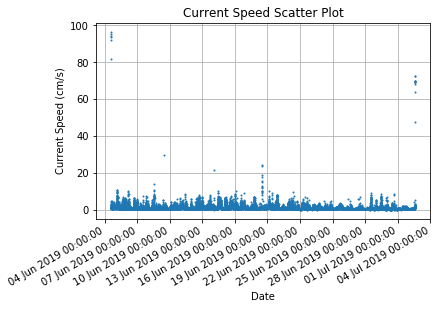

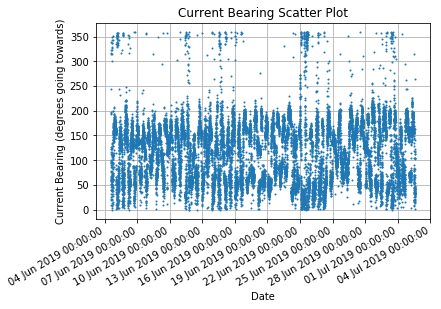

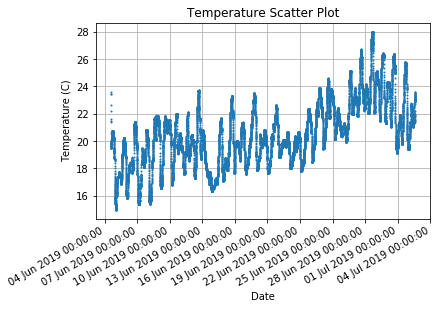

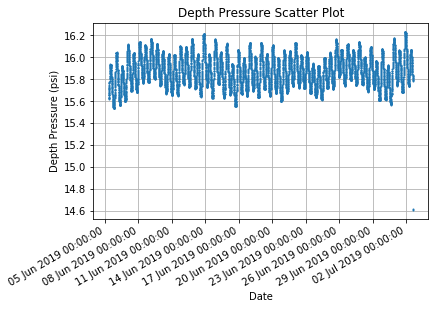

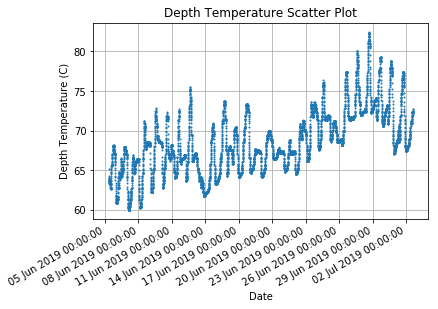

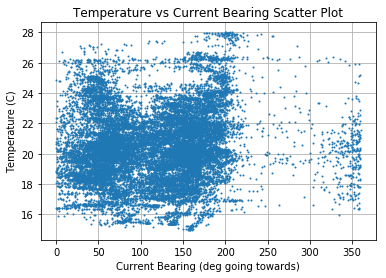

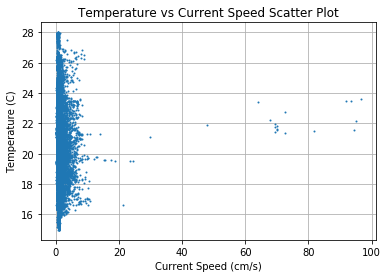

In [15]:
make_plots(junecurrent_df,junetemp_df,junedepth_df)

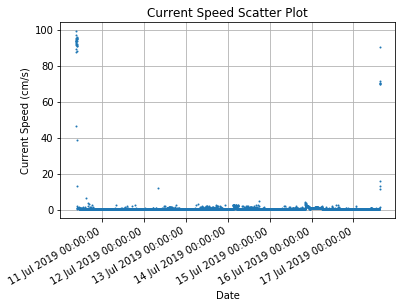

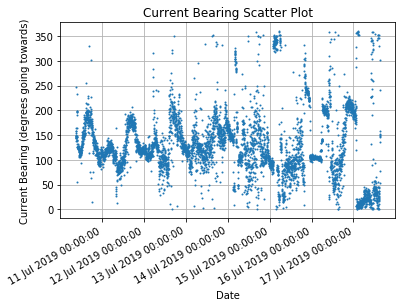

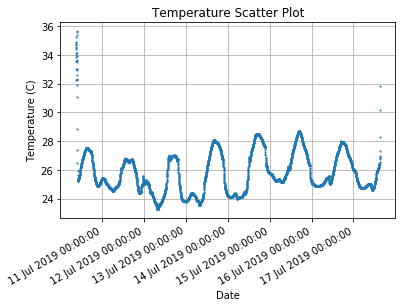

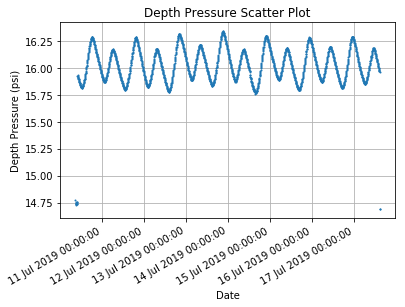

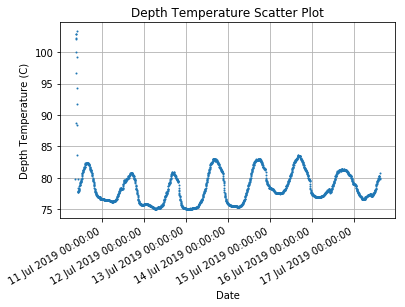

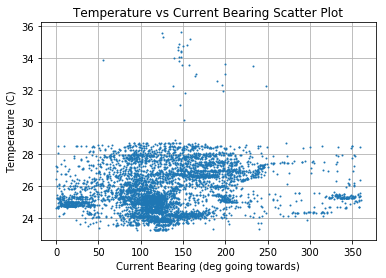

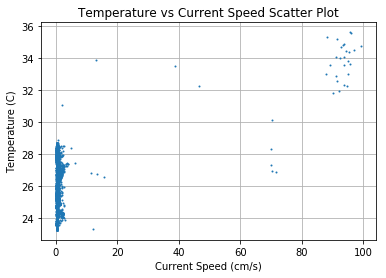

In [16]:
make_plots(julycurrent_df,julytemp_df,julydepth_df)

The low current speed suggests that the insturment was not logging acurrately. 

In [17]:
# calculates when rising and falling tides occur
def getRF(df_current,df_depth):
    rising=getRising(df_depth)
    falling=getFalling(df_depth)
    current_rising_interp=np.interp(df_depth['unixtime'][rising],df_current['unixtime'],df_current['speed'])
    current_falling_interp=np.interp(df_depth['unixtime'][falling],df_current['unixtime'],df_current['speed'])
    bearing_rising_interp=np.interp(df_depth['unixtime'][rising],df_current['unixtime'],df_current['bearing'])
    bearing_falling_interp=np.interp(df_depth['unixtime'][falling],df_current['unixtime'],df_current['bearing'])
    
    fig1 = plt.figure()
    ax = fig1.add_subplot(111)
    ax.plot(df_depth['datetime'][rising],df_depth['pressure'][rising],'r.', markersize=2, label='Rising Tide')
    ax.plot(df_depth['datetime'][falling],df_depth['pressure'][falling], 'b.',markersize=2, label='Falling Tide')
    # format your data to desired format. Here I chose YYYY-MM-DD but you can set it to whatever you want.
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y %H:%M:%S'))
    # rotate and align the tick labels so they look better
    fig1.autofmt_xdate()
    plt.xlabel("Date")
    plt.title("Rising and Falling Tides Scatter Plot")
    plt.ylabel("Depth Pressure (psi)")
    legend = plt.legend(loc='lower right')
    legend.legendHandles[0]._sizes = [10]
    legend.legendHandles[1]._sizes = [20]
    plt.grid()
    plt.show()

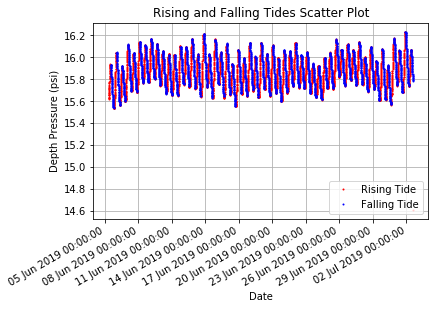

In [18]:
getRF(junecurrent_df,junedepth_df)

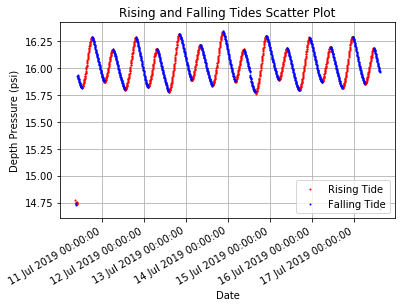

In [19]:
getRF(julycurrent_df,julydepth_df)

In [20]:
def make_hist(df_current,df_depth):
    rising=getRising(df_depth)
    falling=getFalling(df_depth)
    current_rising_interp=np.interp(df_depth['unixtime'][rising],df_current['unixtime'],df_current['speed'])
    current_falling_interp=np.interp(df_depth['unixtime'][falling],df_current['unixtime'],df_current['speed'])
    bearing_rising_interp=np.interp(df_depth['unixtime'][rising],df_current['unixtime'],df_current['bearing'])
    bearing_falling_interp=np.interp(df_depth['unixtime'][falling],df_current['unixtime'],df_current['bearing'])
    
    fig4 = plt.figure()
    ax = fig4.add_subplot(111)
    plt.hist2d(bearing_rising_interp,df_depth['pressure'][rising], bins=(50,20))
    plt.axis([0, 360,15.6, 16.4])
    plt.xlabel("Current Bearing (deg going towards)")
    plt.ylabel("Depth Pressure (psi)")
    plt.title("Rising Tide Depth Pressure vs Current Bearing Histogram")
    plt.colorbar()
    plt.grid()
    plt.show()
    
    fig5 = plt.figure()
    ax = fig5.add_subplot(111)
    plt.hist2d(bearing_falling_interp,df_depth['pressure'][falling], bins=(50,20))
    plt.axis([0, 360,15.6, 16.4])
    plt.xlabel("Current Bearing (deg going towards)")
    plt.ylabel("Depth Pressure (psi)")
    plt.title("Falling Tide Depth Pressure vs Current Bearing Histogram")
    plt.colorbar()
    plt.grid()
    plt.show()

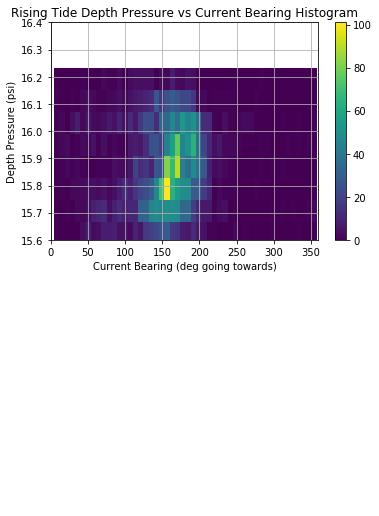

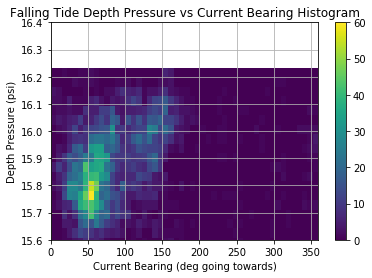

In [21]:
make_hist(junecurrent_df,junedepth_df)

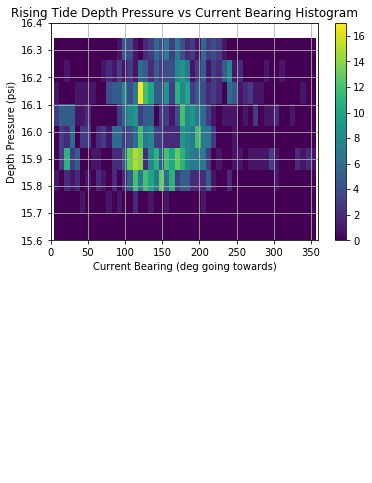

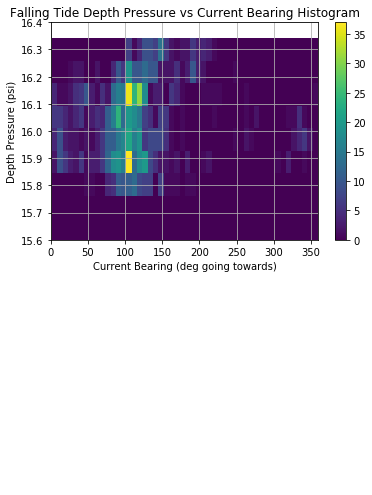

In [22]:
make_hist(julycurrent_df,julydepth_df)

This suggest that the falling tide moves towards the East (about 90 deg) while the rising tide is somewhat all over the place.

In [23]:
def checkSpeed(df_current,df_depth):
    rising=getRising(df_depth)
    falling=getFalling(df_depth)
    current_rising_interp=np.interp(df_depth['unixtime'][rising],df_current['unixtime'],df_current['speed'])
    current_falling_interp=np.interp(df_depth['unixtime'][falling],df_current['unixtime'],df_current['speed'])
    bearing_rising_interp=np.interp(df_depth['unixtime'][rising],df_current['unixtime'],df_current['bearing'])
    bearing_falling_interp=np.interp(df_depth['unixtime'][falling],df_current['unixtime'],df_current['bearing']) 
    
    fig2 = plt.figure()
    plt.hist2d(current_rising_interp,df_depth['pressure'][rising], bins=(250,50))
    plt.axis([0, 4,15.6, 16.4])
    plt.xlabel("Current Speed (cm/s)")
    plt.ylabel("Depth Pressure (psi)")
    plt.title("Rising Tide Depth Pressure vs Current Speed Histogram")
    plt.colorbar()
    plt.grid()
    plt.show()
    
    fig3 = plt.figure()
    plt.hist2d(current_falling_interp,df_depth['pressure'][falling], bins=(250,50))
    plt.axis([0, 4,15.6, 16.4])
    plt.xlabel("Current Speed (cm/s)")
    plt.ylabel("Depth Pressure (psi)")
    plt.title("Falling Tide Depth Pressure vs Current Speed Histogram")
    plt.colorbar()
    plt.grid()
    plt.show()
    
  

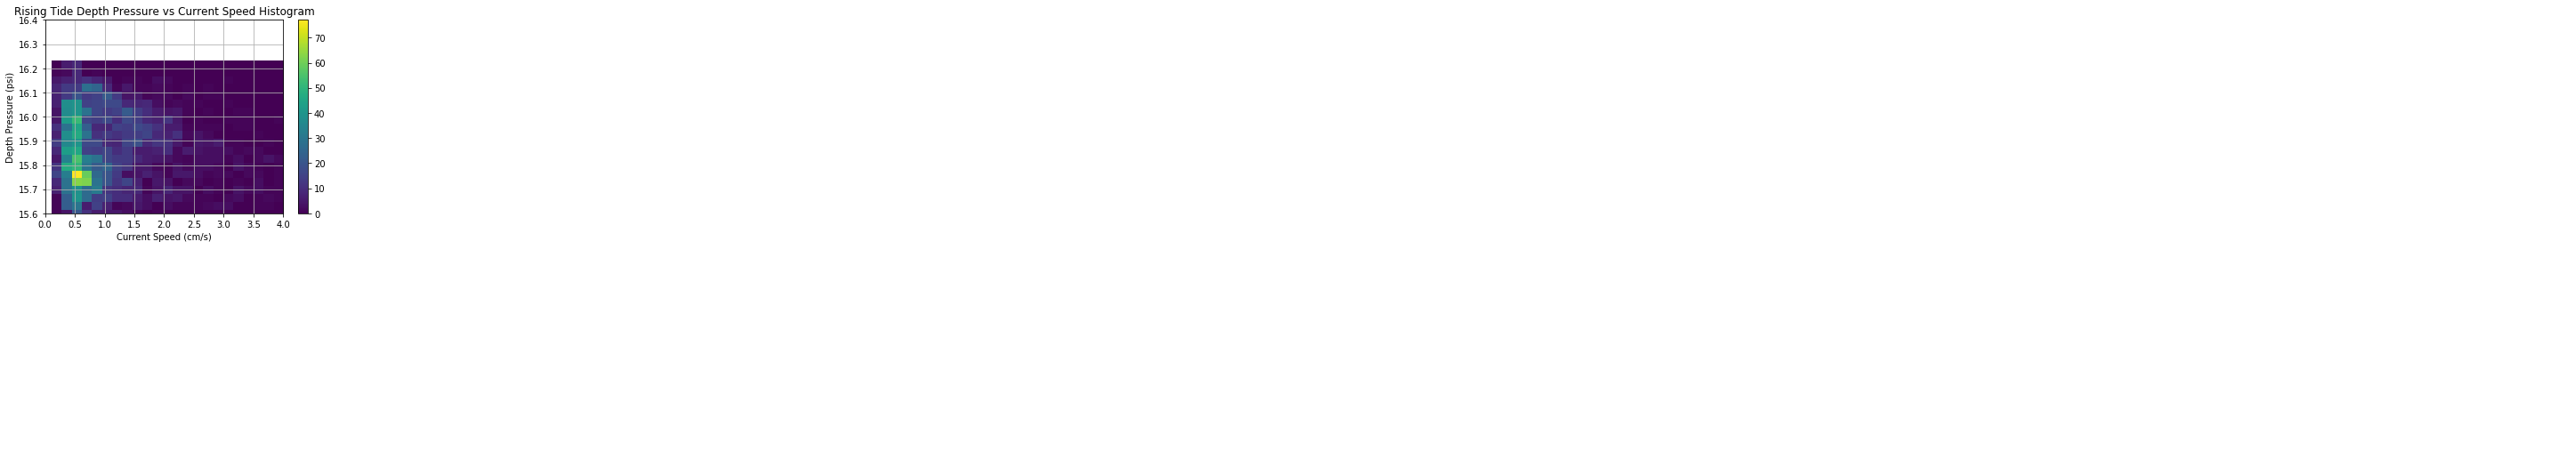

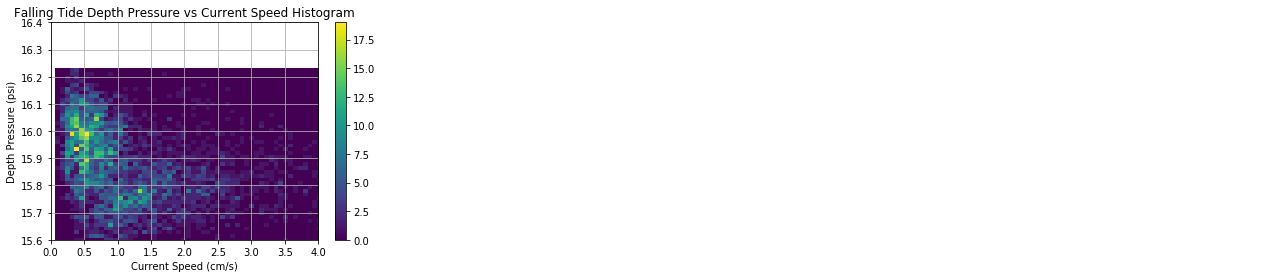

In [24]:
checkSpeed(junecurrent_df,junedepth_df)

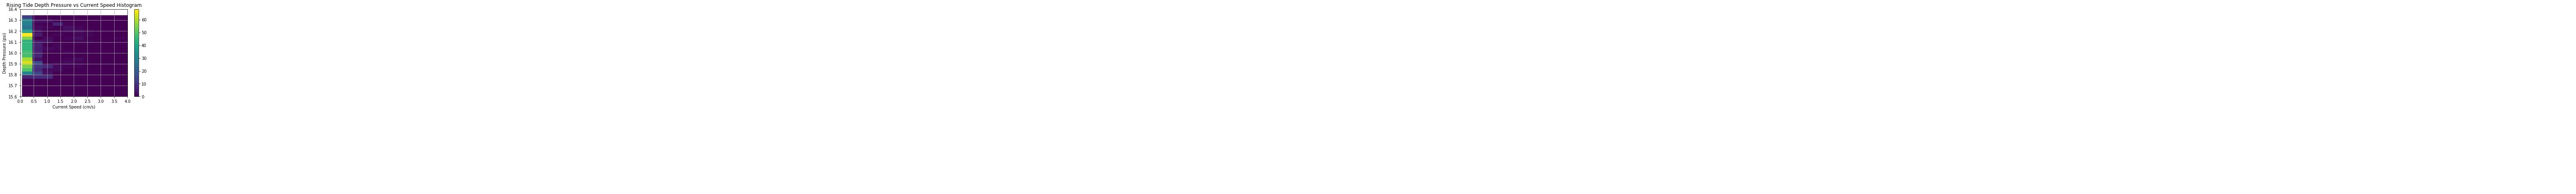

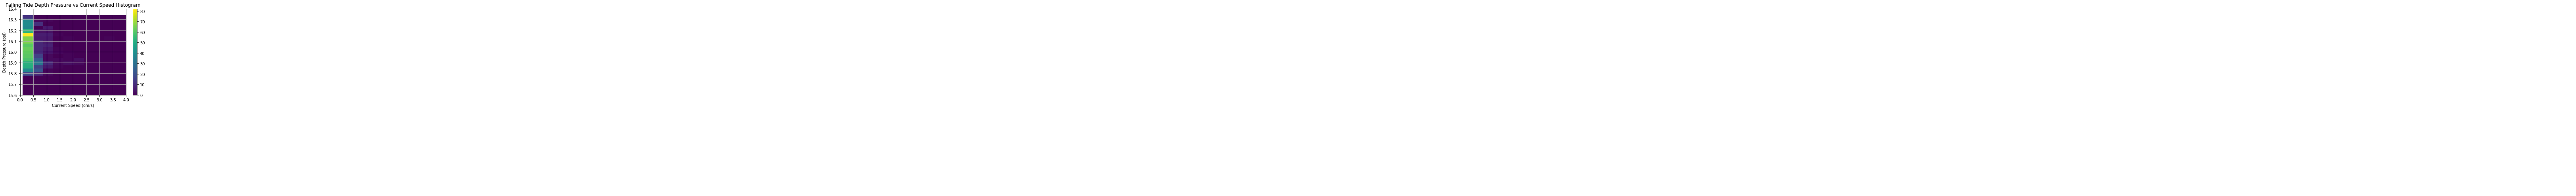

In [25]:
checkSpeed(julycurrent_df,julydepth_df)
# double click on figure to enlarge

The data suggests that the current falls slightly faster than the rising.

In [26]:
apriltemp_df['day'] = pd.DatetimeIndex(apriltemp_df['datetime']).day
apriltemp_df['month'] = pd.DatetimeIndex(apriltemp_df['datetime']).month
apriltemp_df['year'] = pd.DatetimeIndex(apriltemp_df['datetime']).year

junetemp_df['day'] = pd.DatetimeIndex(junetemp_df['datetime']).day
junetemp_df['month'] = pd.DatetimeIndex(junetemp_df['datetime']).month
junetemp_df['year'] = pd.DatetimeIndex(junetemp_df['datetime']).year

julytemp_df['day'] = pd.DatetimeIndex(julytemp_df['datetime']).day
julytemp_df['month'] = pd.DatetimeIndex(julytemp_df['datetime']).month
julytemp_df['year'] = pd.DatetimeIndex(julytemp_df['datetime']).year

In [27]:
result=pd.concat([apriltemp_df, junetemp_df, julytemp_df])
result.head(10)

,time,datetime,unixtime,temp,day,month,year
0,2019-04-17T12:09:34.000,2019-04-17 12:09:34,1.555521e+09,20.1397,17,4,2019
1,2019-04-17T12:11:34.000,2019-04-17 12:11:34,1.555521e+09,20.5680,17,4,2019
2,2019-04-17T12:13:34.000,2019-04-17 12:13:34,1.555521e+09,21.1844,17,4,2019
3,2019-04-17T12:15:34.000,2019-04-17 12:15:34,1.555521e+09,22.0143,17,4,2019
4,2019-04-17T12:17:34.000,2019-04-17 12:17:34,1.555521e+09,22.4610,17,4,2019
5,2019-04-17T12:19:34.000,2019-04-17 12:19:34,1.555522e+09,22.0995,17,4,2019
6,2019-04-17T12:21:34.000,2019-04-17 12:21:34,1.555522e+09,21.6067,17,4,2019
7,2019-04-17T12:23:34.000,2019-04-17 12:23:34,1.555522e+09,21.6259,17,4,2019
8,2019-04-17T12:25:34.000,2019-04-17 12:25:34,1.555522e+09,21.2721,17,4,2019
9,2019-04-17T12:27:34.000,2019-04-17 12:27:34,1.555522e+09,20.5557,17,4,2019


In [28]:
result['monthday'] = result['datetime'].apply(lambda x:x.strftime('%m/%d'))
result.dtypes

time                object
datetime    datetime64[ns]
unixtime           float64
temp               float64
day                  int64
month                int64
year                 int64
monthday            object
dtype: object

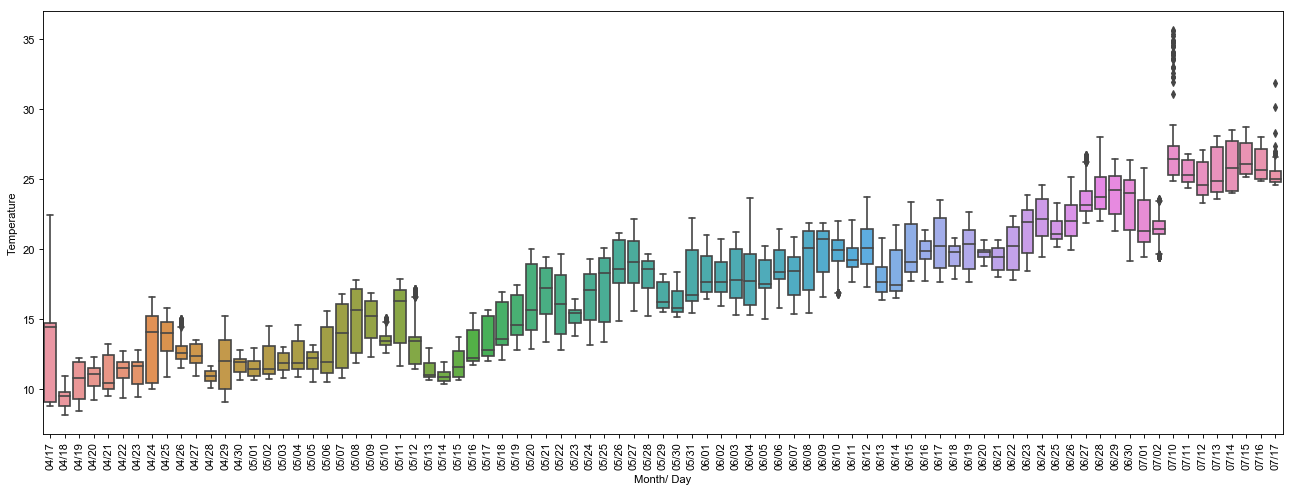

In [29]:
import seaborn as sns
fig = plt.subplots(1, figsize=(20,7), dpi= 80)
plt.xticks(rotation=90)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
country_firstleague_ranks =sns.boxplot(x='monthday', y='temp', data=result).set(
    xlabel='Month/ Day', 
    ylabel='Temperature'
)


This plot represents the change in temperature from April-June. As you can see in the plot, the temperature varies greatly by day but is steadily gettting warm since it is summer.

In [30]:
import pandas as pd
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral3
from bokeh.models.annotations import Title
output_file('temp_lineplot.html')

source1 = ColumnDataSource(apriltemp_df)
source2 = ColumnDataSource(junetemp_df)
source3 = ColumnDataSource(julytemp_df)

p = figure(x_axis_type='datetime')
t=Title()
t.text = 'Change in Temperature'
p.title = t
p.line(x='datetime', y='temp', line_width=2, source=source1, legend='April-June Temp', color='red')
p.line(x='datetime', y='temp', line_width=2, source=source2, legend='June-July Temp', color='blue')
p.line(x='datetime', y='temp', line_width=2, source=source3, legend='July Temp', color='green')
p.yaxis.axis_label = 'Temperature'
show(p)

In [31]:
df1=junetemp_df.groupby(junetemp_df.datetime.dt.date).mean()

In [32]:
df2=junecurrent_df.groupby(junecurrent_df.datetime.dt.date).mean()

In [33]:
def fahr_to_celsius(temp_fahr):
    temp_celsius = (temp_fahr - 32) * 5.0 / 9.0
    return temp_celsius

In [34]:
junedepth_df['temp']=fahr_to_celsius(junedepth_df['temp'])

In [35]:
df3=junedepth_df.groupby(junecurrent_df.datetime.dt.date).mean()

In [36]:
result2 = pd.merge(df1, df2, on='datetime')
result2 = pd.merge(result2, df3, on='datetime')
result2.head()

,unixtime_x,temp_x,day,month,year,unixtime_y,speed,bearing,velocityN,velocityE,unixtime,pressure,temp_y
datetime,,,,,,,,,,,,,
2019-06-04,1.559692e+09,19.314194,4,6,2019,1.559692e+09,3.256262,136.394377,-1.762268,0.600160,1.559786e+09,15.757894,17.964258
2019-06-05,1.559754e+09,17.908753,5,6,2019,1.559754e+09,1.828347,117.953319,0.180875,0.717292,1.559941e+09,15.876679,18.452552
2019-06-06,1.559840e+09,18.706420,6,6,2019,1.559840e+09,1.435000,109.588569,0.044389,0.771347,1.560157e+09,15.896691,19.525821
2019-06-07,1.559927e+09,18.205739,7,6,2019,1.559927e+09,1.153125,114.582861,-0.259264,0.710500,1.560373e+09,15.897539,19.248996
2019-06-08,1.560013e+09,19.262523,8,6,2019,1.560013e+09,1.153333,121.171264,-0.616639,0.596139,1.560589e+09,15.872938,19.137953


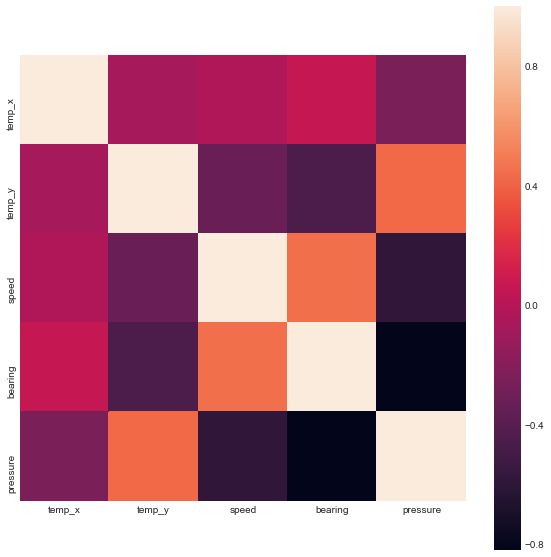

In [37]:
fig, ax = plt.subplots(figsize=(10,10))
cl = result2[['temp_x','temp_y','speed','bearing', 'pressure']].corr()
sns.heatmap(cl, square = True, ax=ax)

This heatmap represents the correlation between all of the physical factors within the pond. There is a fairly high correlation between the temperature taken from the depth meter and the pressure taken from the depth meter. Current bearing (or direction) and pressure show no correlation.

In [38]:
rising=getRising(junedepth_df)
falling=getFalling(junedepth_df)
LR=list(juneLongcurrent_df['bearing'][rising])
LF=list(juneLongcurrent_df['bearing'][falling])
SR=list(junecurrent_df['bearing'][rising])
SF=list(junecurrent_df['bearing'][falling])

f={'LongFalling': LF, 'ShortFalling': SF}
r={'LongRising': LR, 'ShortRising': SR}
df_JuneFalling = pd.DataFrame(f)
df_JuneRising=pd.DataFrame(r)

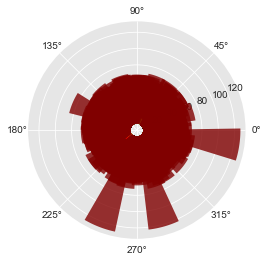

In [39]:
N = 20
bottom = 8
max_height = 4

radii = juneLongcurrent_df['speed']
theta = juneLongcurrent_df['bearing']
width = (2*np.pi) / N

ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=bottom)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r / 10.))
    bar.set_alpha(0.8)

plt.show()

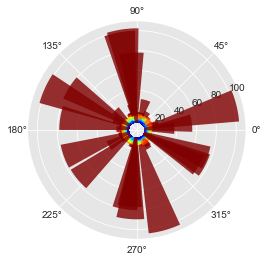

In [40]:
N = 20
bottom = 8
max_height = 4

radii = junecurrent_df['speed']
theta = junecurrent_df['bearing']
width = (2*np.pi) / N

ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=bottom)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r / 10.))
    bar.set_alpha(0.8)

plt.show()

These plots represent the direction in which the tilt meter was pulled. The tilt meter represented in the first plot had a buoy tied to it, allowing wind to affect its dirrection. The tilt meter represented in the second plot was only affected by the current. I can conclude that the wind pulls the meter to the West (270 deg) and that the current is somewhat all over the place. This means that wind is not the only factor that drives current.

Lets try to see if rising and falling tide affect this.

In [41]:
output_file('fallingCorrelation.html')

source1 = ColumnDataSource(df_JuneFalling)
source2 = ColumnDataSource(df_JuneRising)
x=df_JuneFalling['ShortFalling']
y=df_JuneFalling['LongFalling']

# determine best fit line
par = np.polyfit(x, y, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
y_predicted = [slope*i + intercept  for i in x]

# plot it
fig=figure()
t=Title()
t.text = 'Wind Direction vs Current Direction During Falling Tide'
fig.title = t
fig.circle(x,y, legend='Data')
fig.line(x,y_predicted,color='red',legend= "Regression Line")
fig.yaxis.axis_label = 'Wind Direction During Falling Tide (deg)'
fig.xaxis.axis_label = 'Current Direction During Falling Tide (deg)'
show(fig)

In [42]:
output_file('risingCorrelation.html')

x=df_JuneRising['ShortRising']
y=df_JuneRising['LongRising']



# determine best fit line
par = np.polyfit(x, y, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
y_predicted = [slope*i + intercept  for i in x]

# plot it
fig=figure()
t=Title()
t.text = 'Wind Direction vs Current Direction During Rising Tide'
fig.title = t
fig.circle(x,y, legend='Data')
fig.line(x,y_predicted,color='red',legend= "Regression Line")
fig.yaxis.axis_label = 'Wind Direction During Rising Tide (deg)'
fig.xaxis.axis_label = 'Current Direction During Rising Tide (deg)'
show(fig)

These graphs plot the direction of the wind vs the direction of the current during rising and falling tide. The correlation between the two is okay but not great, leading to the conlcusion that wind is not the only factor that drives current.

# Conclusions:
Last summer, I worked through the University of Rhode Island and collected data for a local oyster farm using different instruments like tilt current meters and a water level logger. The pond that houses the oyster farm has an unpredictable nature and changing conditions like temperature, depth pressure, current direction, and current speed. By using visualization with Matplotlib, Seaborn, and Bokeh, I was able to draw a few different conclusions from my data. I discovered that rising and falling tides have a big effect on understanding the data. For example, the current seems to fall slightly faster than the rising and falls to the East. A buoy was attached to one of the tilt meters so that wind could affect the measured direction. I found that the correlation between wind direction and current direction is not amazing, implying that wind is not the only factor that drives current.